Задание
Задача:

Построить модель полносвязной и сверточной нейронной сети, которая будет отличать маффин от чихуахуа. Необходимо достичь точности (Accuracy) на тестовом датасете  > 85 % с использованием любой архитектуры нейронной сети
План решения:

1. Загрузите данные так, как это было показано в видеоуроках или любым другим известным вам способом.

2. Проведите разбиение на тренировочные и тестовые данные.

In [35]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Rescaling
import matplotlib.pyplot as plt

In [36]:
train_dir = 'M:/1T_education/HomeWork/3.5/train'
test_dir = 'M:/1T_education/HomeWork/3.5/test'
img_height = 180 
img_width = 180   
batch_size = 32   
# Загрузка обучающих данных
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
# Загрузка тестовых данных
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 4733 files belonging to 2 classes.
Found 1184 files belonging to 2 classes.


In [37]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

3. Реализуйте функцию, в которой вы будете определять архитектуру полносвязной модели нейронной сети без использования слоев свёртки. Функция должна возвращать скомпилированную модель и иметь названия fcc_nn(fully-connected_neural_network). Обучите модель нейронной сети, измеряя точность на каждой эпохе с помощью тестовой выборки. 

In [38]:
# *ФУНКЦИЯ ДЛЯ СОЗДАНИЯ ПОЛНОСВЯЗНОЙ НЕЙРОННОЙ СЕТИ*
def fcc_nn():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(180,180,3)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [39]:
# *СОЗДАЕМ МОДЕЛЬ*
model = fcc_nn()
# *ОБУЧЕНИЕ МОДЕЛИ*

history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 25s 164ms/step - accuracy: 0.5553 - loss: 1254.7094 - val_accuracy: 0.5642 - val_loss: 466.6161
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 24s 165ms/step - accuracy: 0.6332 - loss: 304.3698 - val_accuracy: 0.6883 - val_loss: 118.5773
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 24s 165ms/step - accuracy: 0.6362 - loss: 180.4432 - val_accuracy: 0.6883 - val_loss: 86.7769
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 25s 168ms/step - accuracy: 0.6653 - loss: 148.1653 - val_accuracy: 0.6622 - val_loss: 79.5521
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 25s 166ms/step - accuracy: 0.7150 - loss: 51.2117 - val_accuracy: 0.6106 - val_loss: 52.6496
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 25s 165ms/step - accuracy: 0.7040 - loss: 40.2808 - val_accuracy: 0.7331 - val_loss: 20.0905
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 25s 167ms/step - accuracy: 0.7490 - loss: 19.5341 - val_accuracy: 0.6917 - val_loss: 32.9493
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 24s 164ms/step - accur

4. Постройте график зависимости ошибки и точности полносвязной нейронной сети в зависимости от эпох.

In [41]:
# Получение значений лосса и валидационного лосса из истории
def check_metrics(history, figure_name):

    train = history.history[f'{figure_name}']
    val = history.history[f'val_{figure_name}']

    # Построение графика лосса и валидационного лосса
    epochs = range(1, len(train) + 1)
    plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')
    plt.plot(epochs, val, 'b', label=f'Validation {figure_name}')
    plt.title(f'Training and Validation {figure_name}')
    plt.xlabel('Epochs')
    plt.ylabel(f'{figure_name}')
    plt.legend()
    plt.show()


C:\Users\gavri\AppData\Local\Temp\ipykernel_10464\2258487778.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


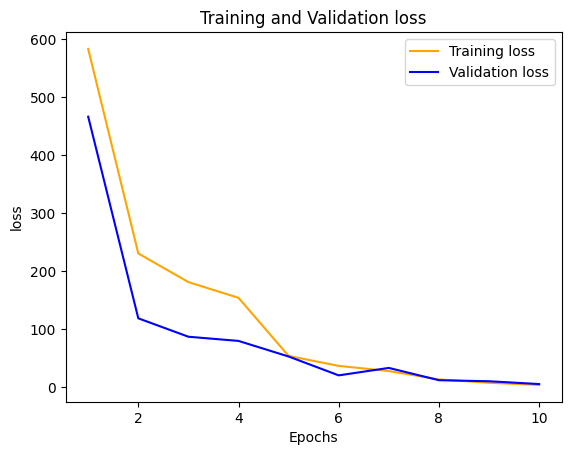

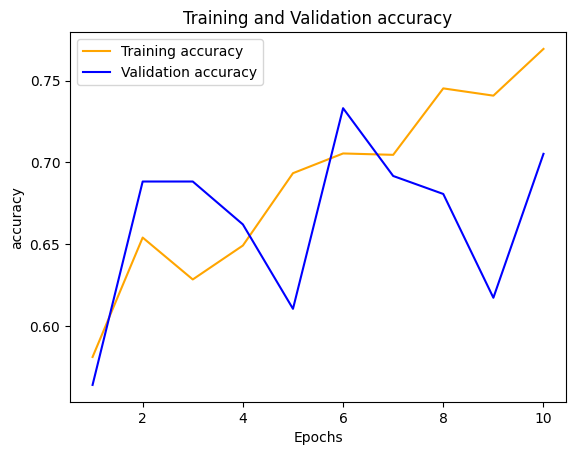

In [42]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

5. Реализуйте функцию, в которой вы будете определять архитектуру полносвязной модели нейронной сети, с использованием слоев свёртки, регуляризации, препроцессинга изображений(Rescaling). Функция должна возвращать скомпилированную модель и иметь названия conv_nn(convolutional_neural_network). Обучите модель нейронной сети, измеряя точность на каждой эпохе с помощью тестовой выборки. 

In [43]:
# *ФУНКЦИЯ ДЛЯ СОЗДАНИЯ МОДЕЛИ*
def conv_nn():
    model = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(train_dataset.class_names), activation='softmax')
    ])
    # Компиляция модели
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [44]:
# *СОЗДАЕМ И ОБУЧАЕМ МОДЕЛЬ*
model = conv_nn()

history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10
)

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 124s 825ms/step - accuracy: 0.6574 - loss: 0.7839 - val_accuracy: 0.8091 - val_loss: 0.4366
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 114s 772ms/step - accuracy: 0.8338 - loss: 0.3871 - val_accuracy: 0.8353 - val_loss: 0.3610
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 104s 701ms/step - accuracy: 0.8694 - loss: 0.3045 - val_accuracy: 0.8834 - val_loss: 0.2798
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 105s 709ms/step - accuracy: 0.9067 - loss: 0.2263 - val_accuracy: 0.8792 - val_loss: 0.2880
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 102s 691ms/step - accuracy: 0.9282 - loss: 0.1716 - val_accuracy: 0.8877 - val_loss: 0.3194
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 101s 681ms/step - accuracy: 0.9568 - loss: 0.1132 - val_accuracy: 0.8936 - val_loss: 0.3330
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 99s 671ms/step - accuracy: 0.9649 - loss: 0.0983 - val_accuracy: 0.8910 - val_loss: 0.3695
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 112s 757ms/step - accuracy: 0.9815 - 

6. Постройте график зависимости ошибки и точности свёрточной нейронной сети в зависимости от эпох.

C:\Users\gavri\AppData\Local\Temp\ipykernel_10464\2258487778.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


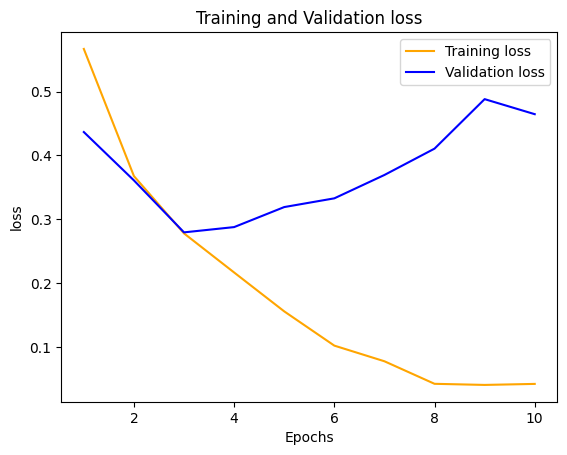

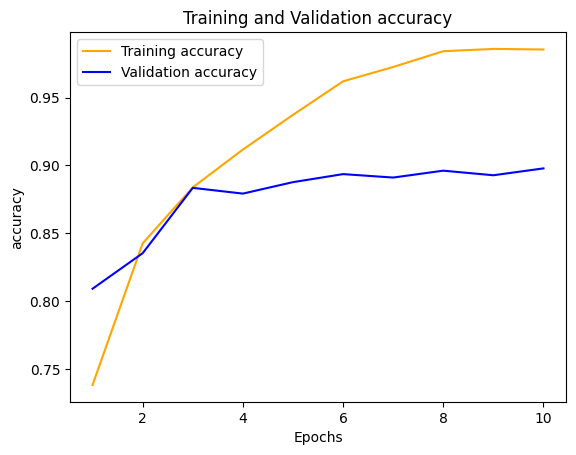

In [46]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

### Вывод:
На основании представленных данных можно смело сказать, что вторая архитектура нейронной сети демонстрирует значительно лучшее качество работы. Это может быть обусловлено тем, что вторая модель использовала более глубокую или более сложную архитектуру с большим количеством слоев и нейронов, что позволило ей лучше изучить закономерности в данных. Были добавлены сверточные слои и слой масштабирования Rescaling.

### Сравнение результатов:
1. Первая архитектура:
   - Лучший accuracy на валидационной выборке: 0,7331
   - Соответствующий accuracy на обучающей выборке: 0,7040

2. Вторая архитектура:
   - Лучший accuracy на валидационной выборке: 0,8978
   - Соответствующий accuracy на обучающей выборке: 0,9822